# TITLE

## Introduction

A research group in Computer Science at UBC, led by Frank Wood, has set up a Minecraft server to explore how people play and develop interest in video games. However, to fully understand the financial and technical needs of this project, the researchers must know which kinds of players are likely to join the server and how many resources these users will occupy. The following analysis aims to answer the research group’s broad question of “What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?” More specifically, our analysis explores if number of sessions, total number of played hours, and mean session duration can be used to predict if players will subscribe to a game-related newsletter as well as the potential variations between experience level.

### Question 
#### Broad Question: 
Question 1: What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?
<br>
<br>
#### Specific Question:
Can hours played, age, and average session length predict whether a user is subscribed to a game-related newsletter? Additionally does this differ by experience?

### Data
To analyze our question, we will use the following two data sets: 
<br>
<br>


`players.csv` contains information about the users of the Minecraft server, PLAICraft. There are 196 observations and 7 variables as follows: 
- `experience` - character: player's self-determined experience level (`Beginner`, `Amateur`, `Regular`, `Veteran`, or `Pro`)
- `subscribe` - logical: player's subscription status to a game-related newsletter (`TRUE` or `FALSE`)
- `hashedEmail` - character: hashed player's email
- `played_hours` - double: total hours played by each user 
- `name` - character: player's first name
- `gender` - character: player's gender
- `Age` - double: player's age
<br>
<br>

`sessions.csv` contains information about sessions played on PLAICraft. There are 1535 observations and 5 variables as follows:
- `hashedEmail` - character: hashed player's email
- `start_time` - character: session start time in dd/mm/yyyy time 
- `end_time` - character: session end time in dd/mm/yyyy time 
- `orginal_start_time` - double: session start time in milliseconds since January 1st, 1970 at Coordinated Universal Time (UNIX time)
- `orginal_end_time` - double: session end time in milliseconds since January 1st, 1970 at Coordinated Universal Time (UNIX time)

## Methods and Results 

The code below loads the necessary libraries and use the option function to set the viewing of data frames to the first 10 rows. Using a github repository, we will load the players and sessions data to our project.

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
library(lubridate)
library(ggplot2)
options(repr.matrix.max.rows = 10) 

players_data <- read_csv("https://raw.githubusercontent.com/skylv777/dsci100_group_project/refs/heads/main/players.csv")


sessions_data <- read_csv("https://raw.githubusercontent.com/skylv777/dsci100_group_project/refs/heads/main/sessions.csv")


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

The code below alters the sessions data frame variables start_time and end_time to be the type datetime(dttm). The code first cleans the sessions_data dataframe by converting both start_time and end_time into proper datetime format so the values are tidy and can be used for calculations. It then creates a new column, session_length, by subtracting start time from end time and converting that difference into a numeric value. After that, the code groups the data by each player’s hashedEmail and calculates the average session length for each player. Finally, it merges this summarized session-length data with the original players_data to produce a combined dataset that includes both player information and their average session duration.

In [2]:
#Tidying sessions_data so there is only one value per cell by converting to dttm format
sessions_data_tidy <- sessions_data |>
         mutate(start_time = dmy_hm(start_time)) |>
         mutate(end_time = dmy_hm(end_time))
#Creating sessions_length column
sessions_data_difference <- sessions_data_tidy |>
        mutate(session_length = end_time - start_time) |>
        mutate(session_length = as.double(session_length))
# Determining average session length per player
average_sessions_data <- sessions_data_tidy |>
         mutate(session_length = end_time - start_time) |>
         mutate(session_length = as.double(session_length)) |>
         group_by(hashedEmail) |>
         select(session_length) |>
         summarize(average_session_length = mean(session_length))
# Combining Data Sets
combined_data <- merge(players_data, average_sessions_data)
head(combined_data)

Adding missing grouping variables: `hashedEmail`


,hashedEmail,experience,subscribe,played_hours,name,gender,Age,average_session_length
,<chr>,<chr>,<lgl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
1,0088b5e134c3f0498a18c7ea6b8d77b4b0ff1636fc93355ccc95b45423367832,Regular,TRUE,1.5,Isaac,Male,20,53.00000
2,060aca80f8cfbf1c91553a72f4d5ec8034764b05ab59fe8e1cf0eee9a7b67967,Pro,FALSE,0.4,Lyra,Male,21,30.00000
3,0ce7bfa910d47fc91f21a7b3acd8f33bde6db57912ce0290fa0437ce0b97f387,Beginner,TRUE,0.1,Osiris,Male,17,11.00000
4,0d4d71be33e2bc7266ee4983002bd930f69d304288a8663529c875f40f1750f3,Regular,TRUE,5.6,Winslow,Male,17,32.15385
5,0d70dd9cac34d646c810b1846fe6a85b9e288a76f5dcab9c1ff1a0e7ca200b3a,Pro,TRUE,1.0,Knox,Male,17,35.00000
6,11006065e9412650e99eea4a4aaaf0399bc338006f85e80cc82d18b49f0e2aa4,Veteran,FALSE,0.1,Callum,Male,19,10.00000


### Summmary Statistics
​​The code selects the quantitative variables from the combined_data dataset (Age, played_hours, and average_session_length) so that summary statistics can be calculated. It then computes several descriptive statistics for each variable,including the mean, median, mode, minimum, maximum, first quartile, third quartile, and standard deviation, while removing missing values. A small helper function is used to calculate the mode by counting the most frequent value. All statistics are then combined into a tidy summary table called players_data_stats, which organizes the statistics into labeled rows and relocates them so that “Summary” appears first before the numerical columns.

In [3]:
#Summary Statistics on Quantitative Values of players_data 
combined_data_select <- select(combined_data, Age, played_hours, average_session_length)

players_data_stats <- 
        bind_rows(map_df(combined_data_select, mean, na.rm = TRUE), 
                  map_df(combined_data_select, median, na.rm = TRUE),
                  map_df(combined_data_select, ~{
    x <- na.omit(.x)
    if (length(x) == 0) return(NA_real_)
    tibble(val = x) |>
      count(val, sort = TRUE) |>
      filter(n == max(n)) |>
      slice_head(n = 1) |>   
      pull(val)}),
                  map_df(combined_data_select, min, na.rm = TRUE),
                  map_df(combined_data_select, max, na.rm = TRUE), 
                  map_df(combined_data_select, sd, na.rm = TRUE), #?seems too high
                  map_df(combined_data_select, ~ quantile(.x, probs = 0.25, na.rm = TRUE)[[1]]),
                  map_df(combined_data_select, ~ quantile(.x, probs = 0.5, na.rm = TRUE)[[1]]),
                  map_df(combined_data_select, ~ quantile(.x, probs = 0.75, na.rm = TRUE)[[1]])) |>
        mutate(Summary = c("Mean", "Median", "Mode", "Minimum", "Maximum", "Standard Deviation", "1st Quartile", "2nd Quartile", "3rd Quartile")) |>
        relocate(Summary) |>
        mutate(across(Age:average_session_length, \(x) round(x, digits = 2)))
        
players_data_stats

Summary,Age,played_hours,average_session_length
<chr>,<dbl>,<dbl>,<dbl>
Mean,21.59,9.17,31.73
Median,19.00,0.30,18.50
Mode,17.00,0.10,5.00
Minimum,9.00,0.00,5.00
Maximum,58.00,223.10,147.00
Standard Deviation,8.41,35.13,30.86
1st Quartile,17.00,0.10,10.00
2nd Quartile,19.00,0.30,18.50
3rd Quartile,23.00,1.50,43.00


### Summary Visualizations

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


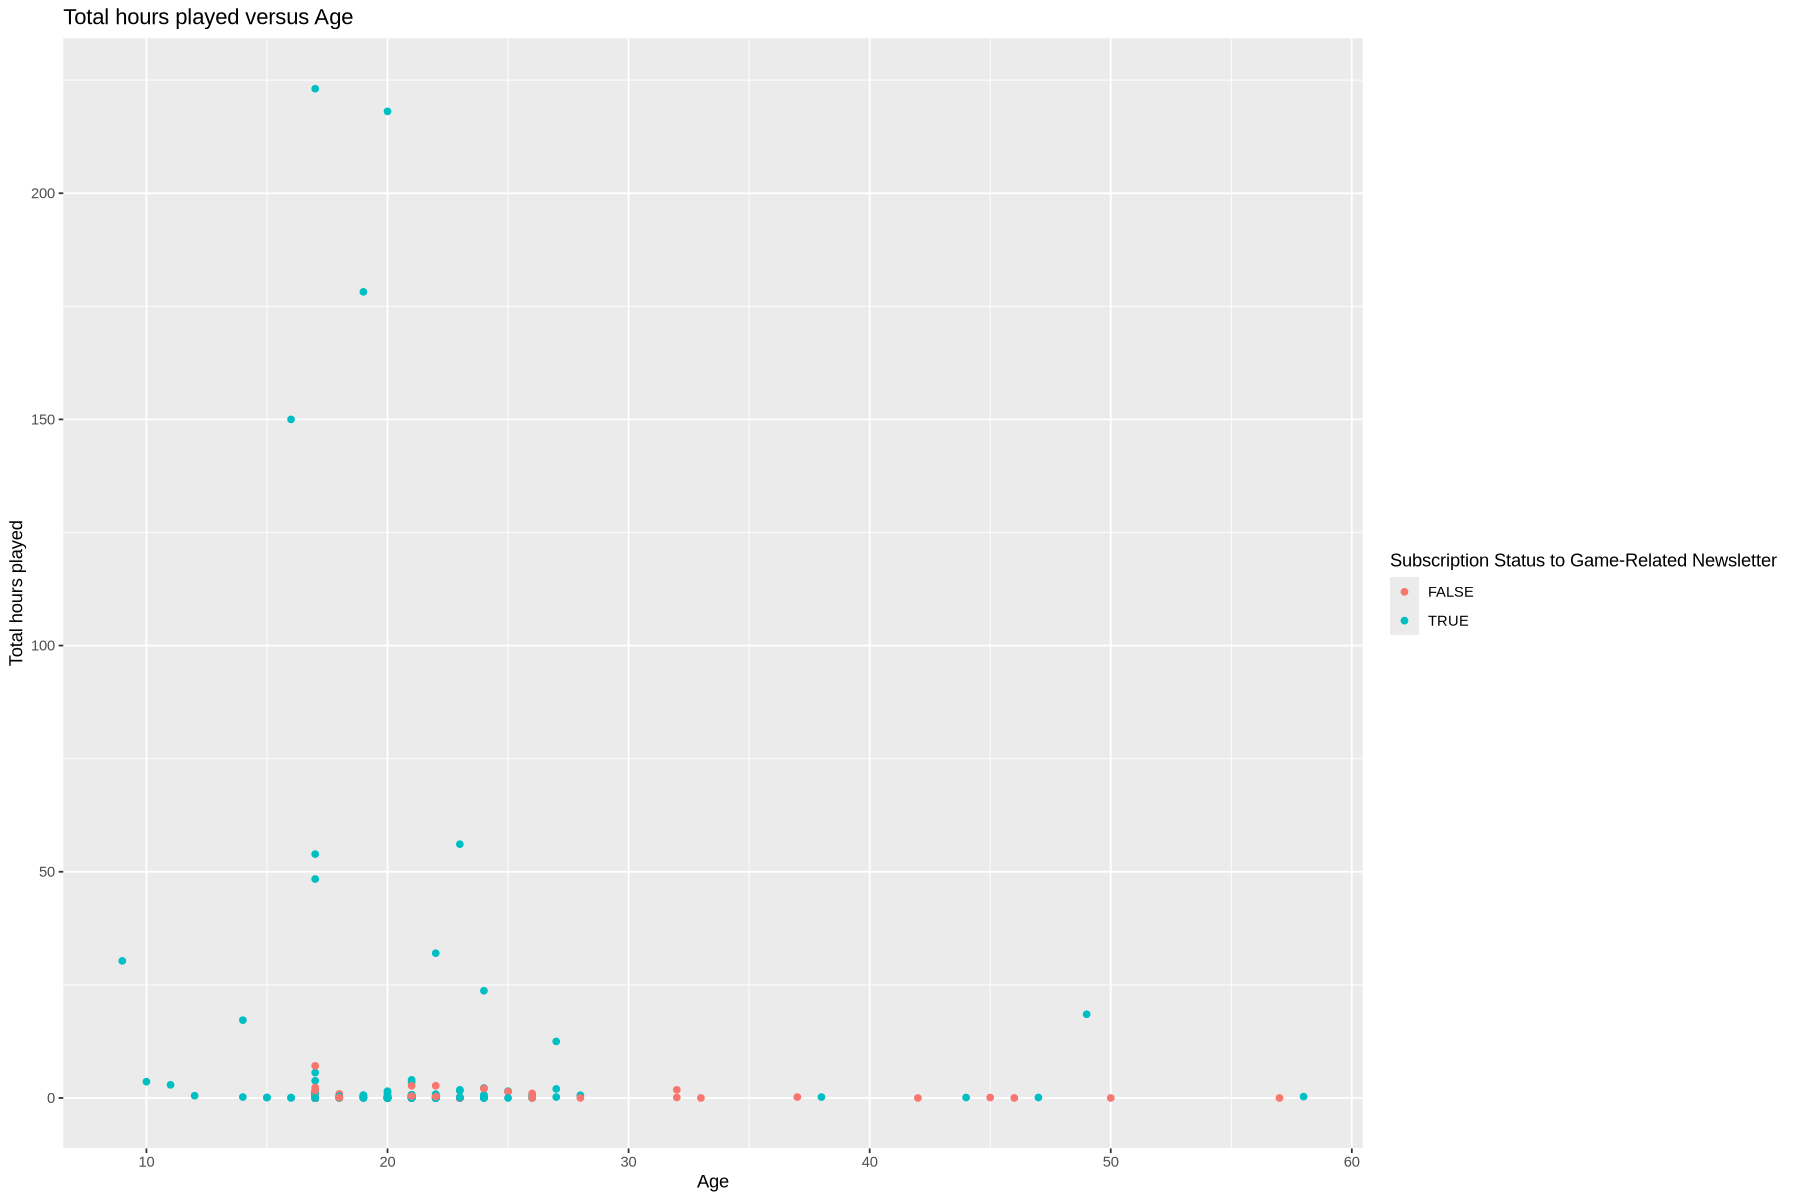

In [4]:
options(repr.plot.height = 10, repr.plot.width = 15)
hours_age_subscribe_plot <- players_data |>
        ggplot(aes(x = Age, y = played_hours, colour = subscribe)) +
        geom_point() +
        labs (x = "Age",
              y = "Total hours played",
              colour = "Subscription Status to Game-Related Newsletter") +
        ggtitle("Total hours played versus Age")
hours_age_subscribe_plot   

The warning message is due to It appears that most players are under 30 and have total hours played under 10 hours especially over 30. Additionally, all the players who played more than 20 hours total were subscribed to a newsletter. It appears that users over 30 are less likely to be subscribed to a newsletter.

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


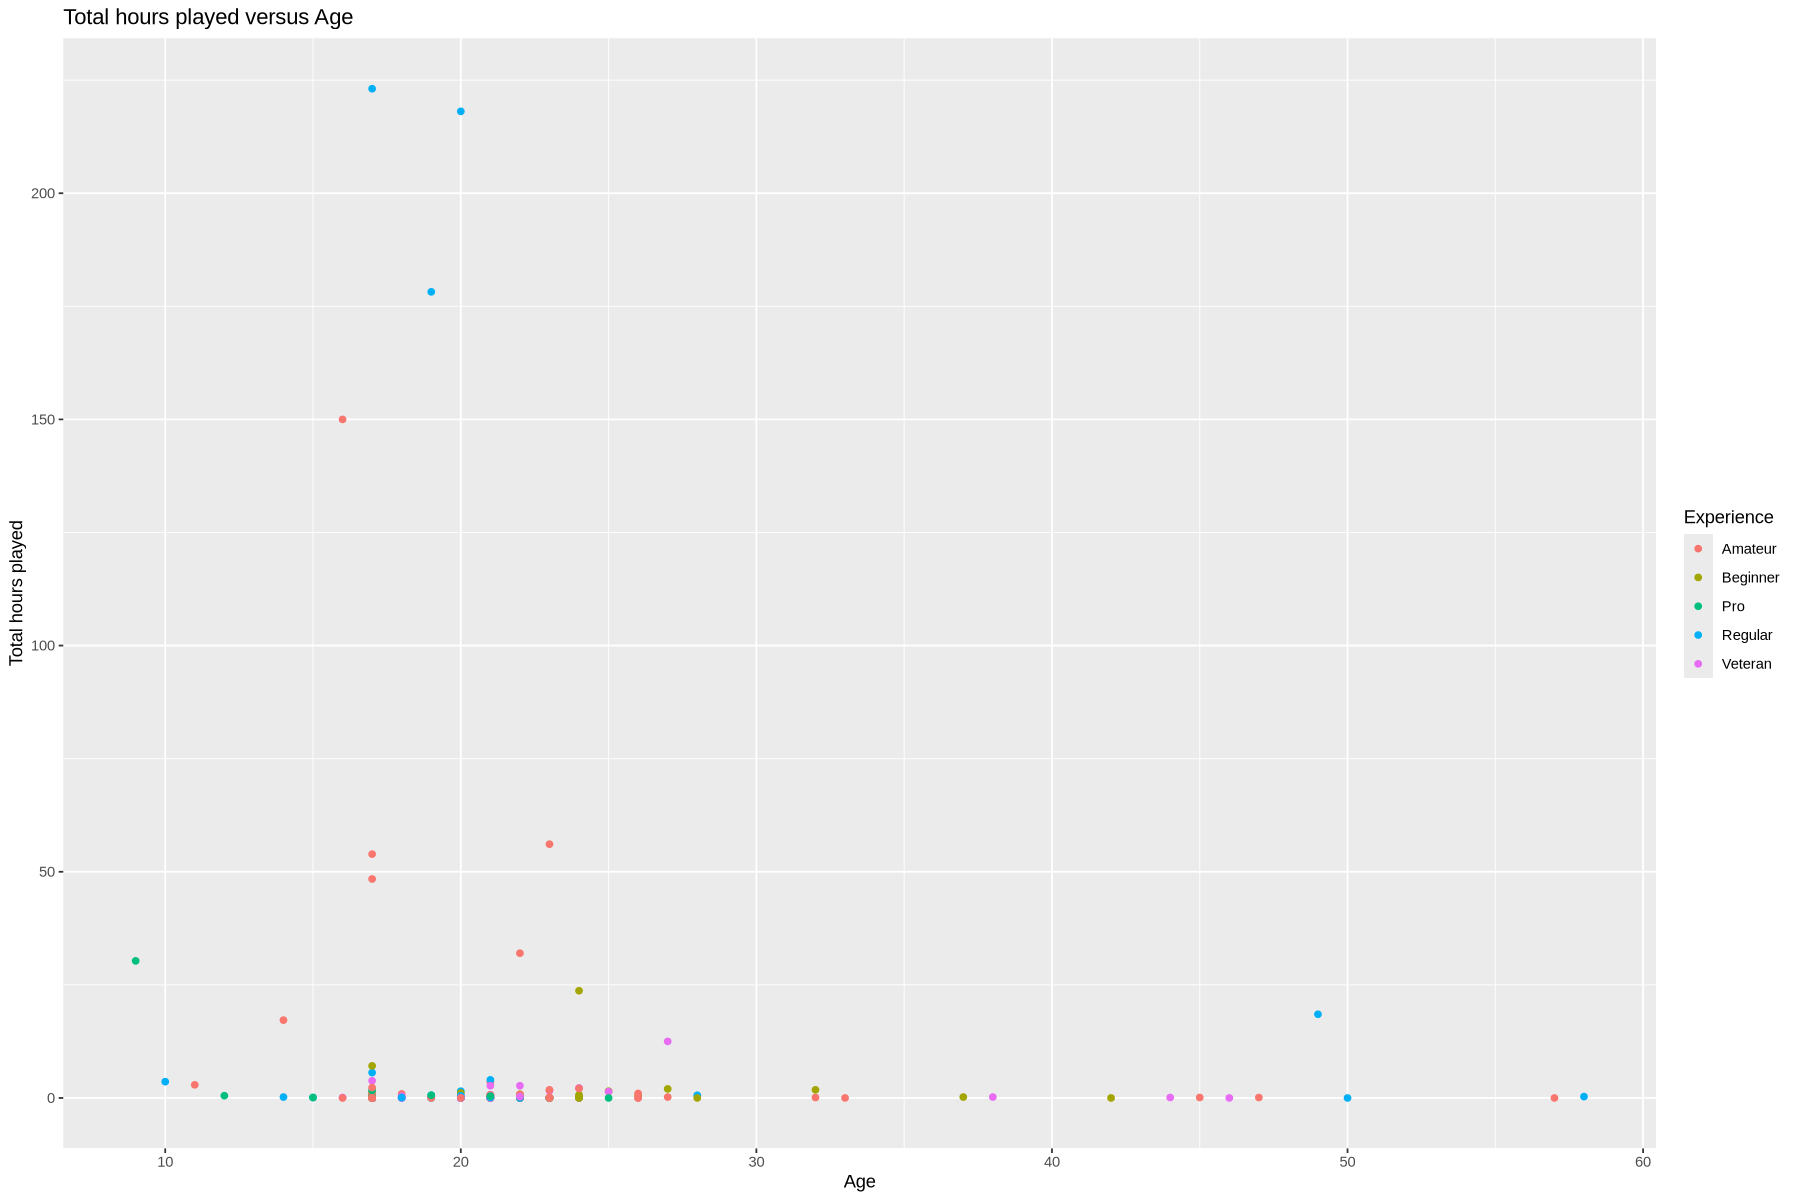

In [5]:
options(repr.plot.height = 10, repr.plot.width = 15)
hours_age_experience_plot <- players_data |>
        ggplot(aes(x = Age, y = played_hours, colour = experience)) +
        geom_point() +
        labs (x = "Age",
              y = "Total hours played",
              colour = "Experience") +
        ggtitle("Total hours played versus Age")
hours_age_experience_plot  

No clear relationship between age and total hours played or experience. However, all the users with over approximately 50 total hours played are either amateur or regular.

Warning message:
“Removed 4 rows containing missing values or values outside the scale range
(`geom_point()`).”


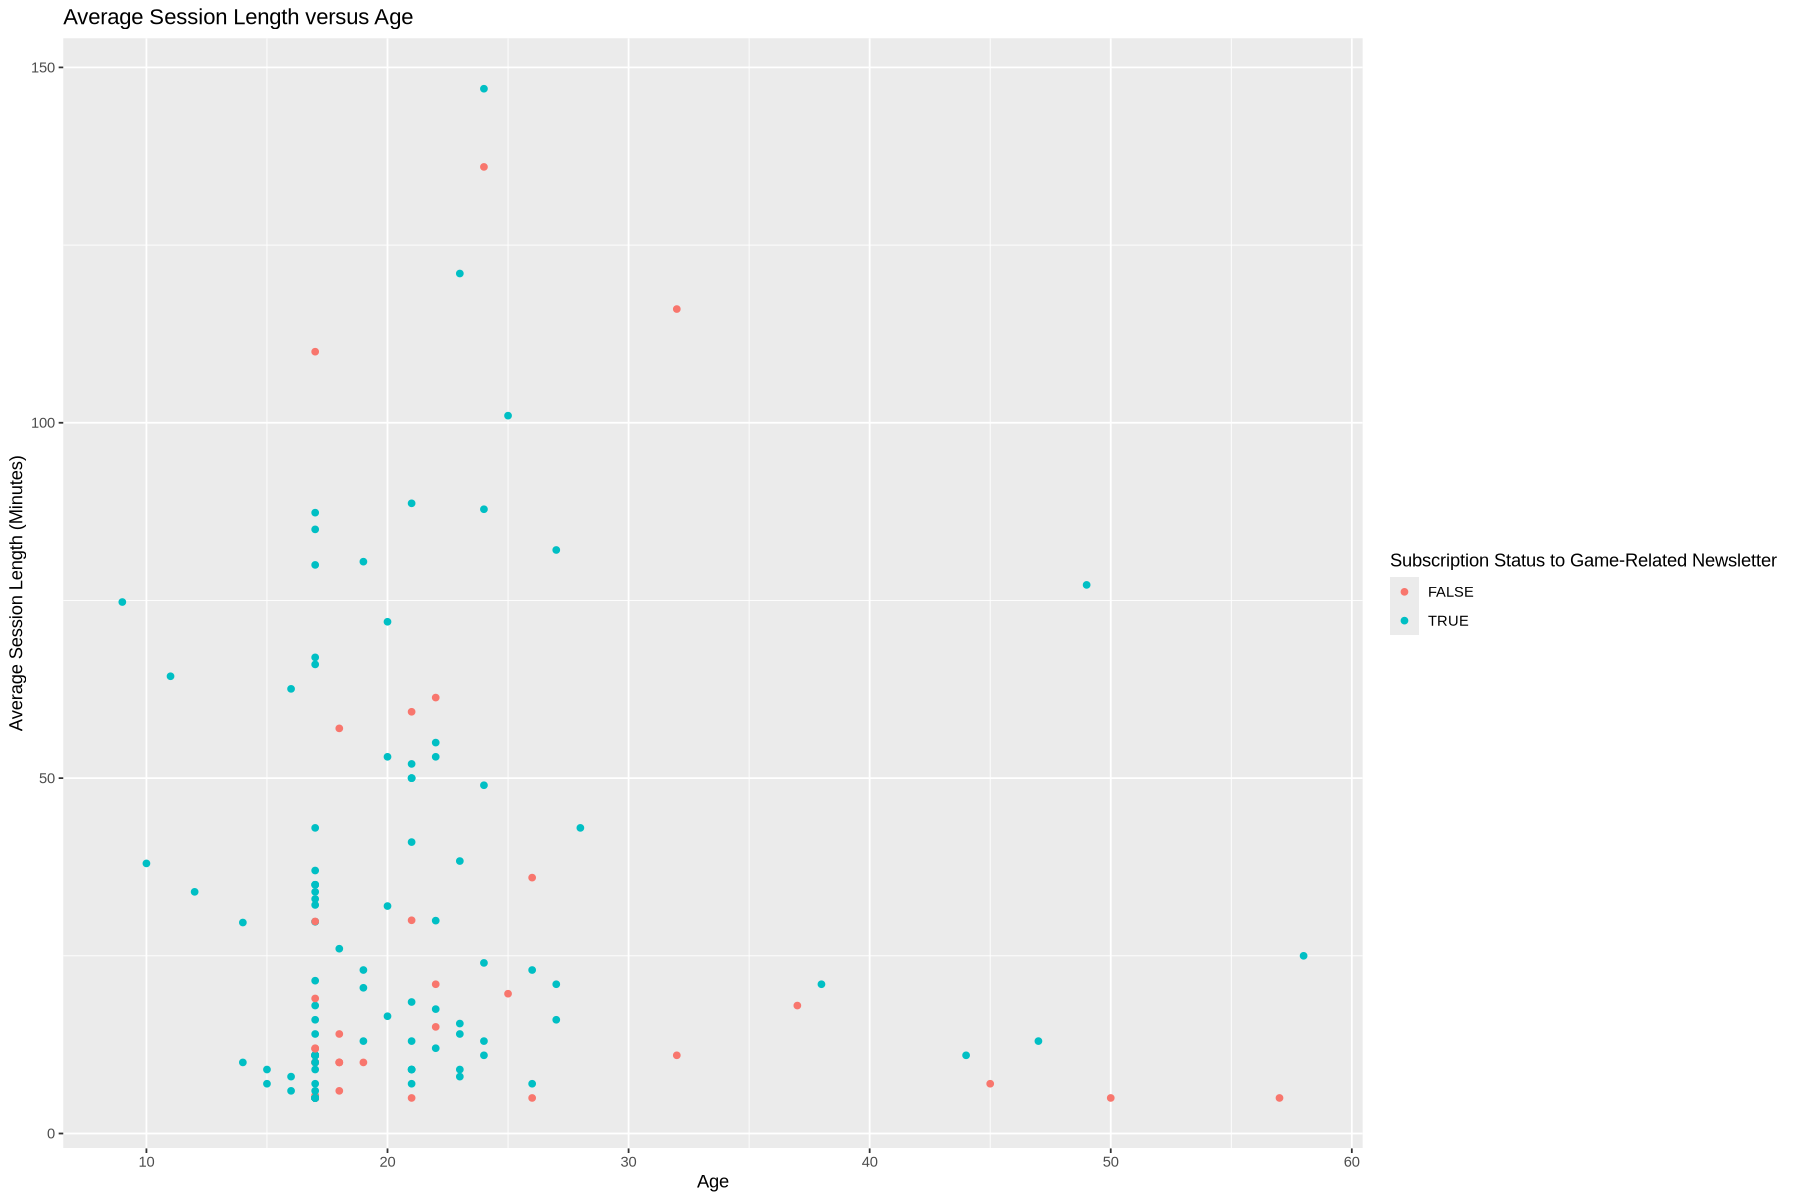

In [6]:
average_age_plot <- combined_data |>
        ggplot(aes(x = Age, y = average_session_length, colour = subscribe)) +
        geom_point() +
        labs (x = "Age",
              y = "Average Session Length (Minutes)",
              colour = "Subscription Status to Game-Related Newsletter") +
        ggtitle("Average Session Length versus Age")
average_age_plot  

It appears that the ratio between users subscribed to users not subscribed to a newsletter is higher with players with average session length above 25 minutes. Additionally, users above the age of 30 appear more likely to have average session length below 25 minutes.

Warning message:
“Removed 4 rows containing missing values or values outside the scale range
(`geom_point()`).”


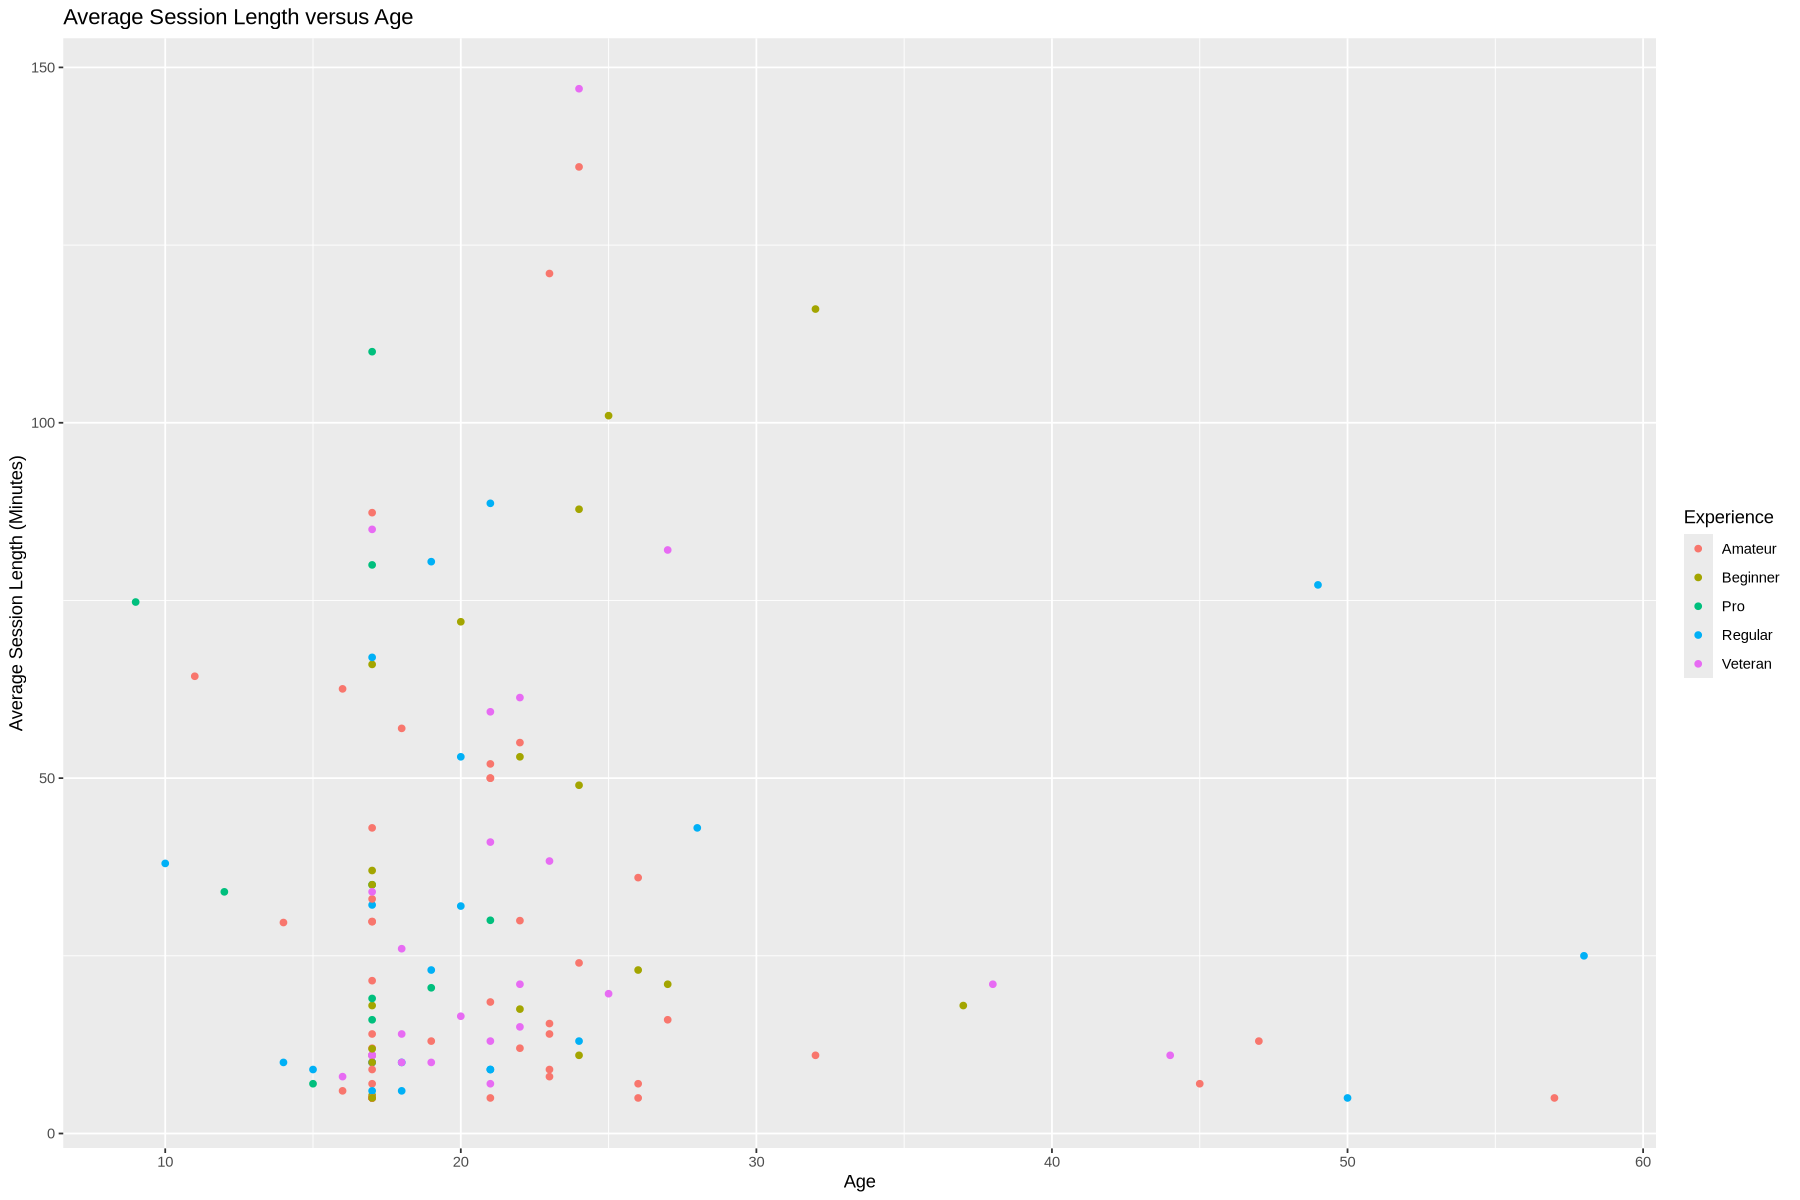

In [7]:
average_age_experience_plot <- combined_data |>
        ggplot(aes(x = Age, y = average_session_length, colour = experience)) +
        geom_point() +
        labs (x = "Age",
              y = "Average Session Length (Minutes)",
              colour = "Experience") +
        ggtitle("Average Session Length versus Age")
average_age_experience_plot  

There does not appear to be any strong relationship between experience and age or average session length. 

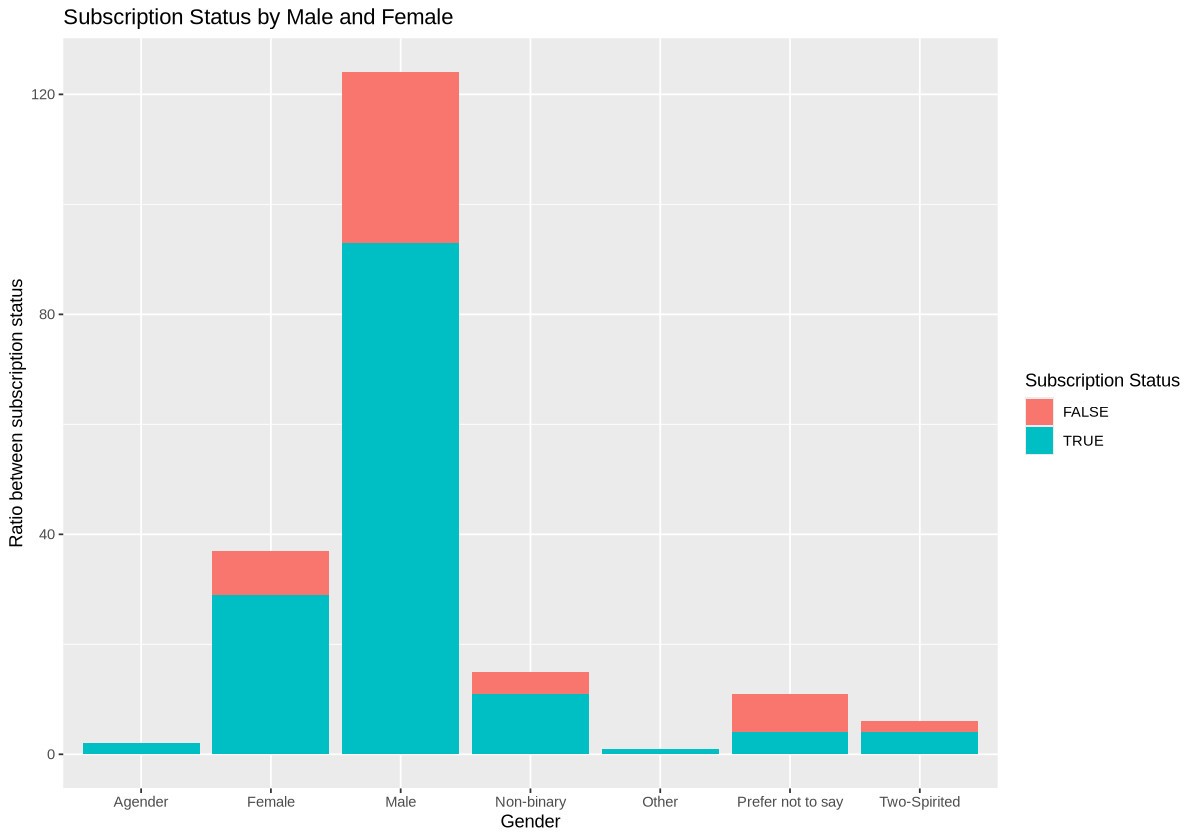

In [84]:

options(repr.plot.height = 7, repr.plot.width = 10)
gender_bar <- players_data |>
        ggplot(aes(x = gender)) +
        geom_bar(aes(fill = subscribe)) +
        ggtitle("Subscription Status by Male and Female") +
        labs(x = "Gender",
             y = "Ratio between subscription status",
             fill = "Subscription Status")
gender_bar

There are varying amounts of users of each experience level and that there are significantly more players subscribed to a newsletter than not.

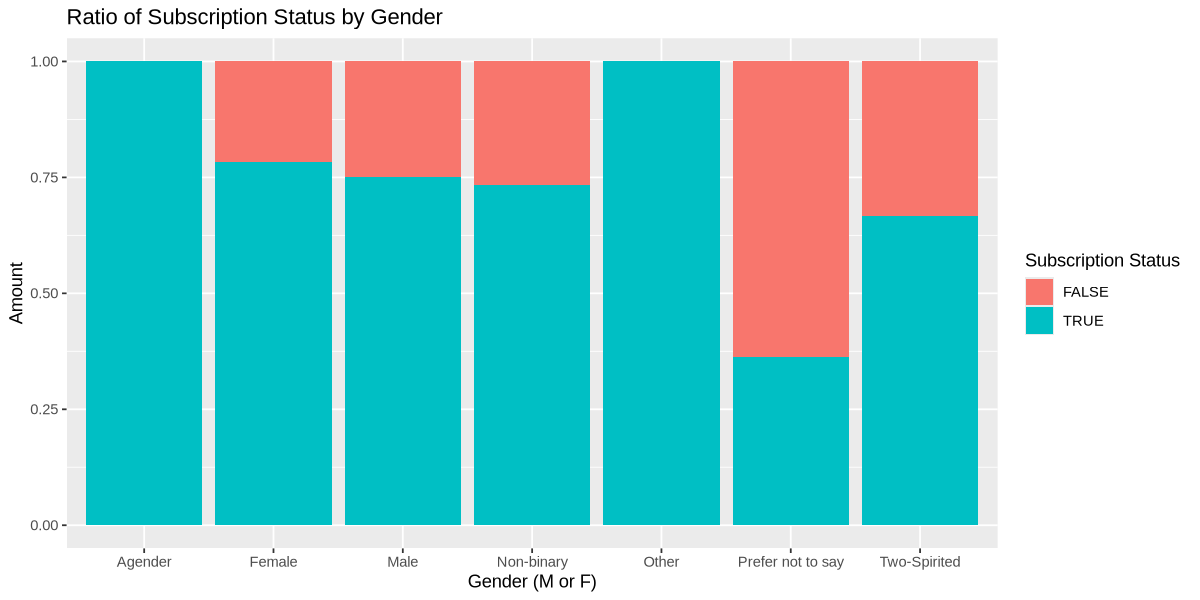

In [83]:
options(repr.plot.height = 5, repr.plot.width = 10)
gender_ratio <- players_data |>
        ggplot(aes(x = gender)) +
        geom_bar(aes(fill = subscribe), position = "fill") +
        ggtitle("Ratio of Subscription Status by Gender") +
        labs(x = "Gender (M or F)",
             y = "Amount",
             fill = "Subscription Status")
gender_ratio    


The ratio between subscription status varies slightly by experience level but there is no indication that increase in experience is related to a change in subscription ratio.

### Data Analysis

In [82]:
#setting seed for reproducibility
set.seed(1)
combined_data_fct <- mutate(combined_data, subscribe = as_factor(subscribe)) |>
        drop_na()

#creating training and testing sets with 25/75 split
videogame_split <- initial_split(combined_data_fct, prop = 0.75, strata = subscribe)
videogame_train <- training(videogame_split)
videogame_test <- testing(videogame_split)

#creating recipe
videogame_recipe <- recipe(subscribe ~ Age + played_hours + average_session_length, data = videogame_train) |>
        step_scale(all_predictors()) |>
        step_center(all_predictors())

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
        set_engine("kknn") |>
        set_mode("classification") 

k_vals <- tibble(neighbors = seq(from = 1, to = 55, by = 1))

videogame_vfold <- vfold_cv(videogame_train, v = 3, strata = subscribe)
    
best_k <- workflow() |>
        add_recipe(videogame_recipe) |>
        add_model(knn_spec) |>
        tune_grid(resamples = videogame_vfold, grid = k_vals) |>
        collect_metrics() |> 
        filter(.metric == "accuracy") |>
        arrange(desc(mean)) |>
        head(1) |>
        pull(neighbors) 
best_k

[1] 5

In [80]:
videogame_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = best_k) |>
         set_engine("kknn") |>
         set_mode("classification") 

videogame_wkfl <- workflow() |>
        add_recipe(videogame_recipe) |>
        add_model(videogame_spec) |>
        fit(data = videogame_train) 

In [ ]:
plot_results <- ggplot() + 
                geom_point(data = cleveland_training, 
                mapping = aes(x = thalach, y = chol, color = diag), 
                alpha = 0.75) +
                geom_point(data = prediction_table, 
                           mapping = aes(x = thalach, 
                           y = chol, 
                           color = diag), 
                           alpha = 0.02, 
                           size = 5) +
                labs(x = "Max Heart Rate", y = "Cholesterol (mg/dl)", 
                     color = "Diagnosis", 
                     title = "Regions of each diagnosis") +
                scale_color_brewer(palette = "Dark2") +
                theme(text = element_text(size = 15))

plot_results

In [85]:
videogame_predict <-predict(videogame_wkfl, videogame_test) |>
        bind_cols(videogame_test)

videogame_predict_accuracy <- videogame_predict |>
        metrics(truth = subscribe, estimate = .pred_class) |>
        filter(.metric == "accuracy")

videogame_predict_accuracy

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7419355


## Discussion 

## GitHub Link